# Pat Tutka 
# Assignment
Warmup. Perform some analysis on Kobe's shot selection. Ask and answer (with charts) questions such as: Does Kobe make more shots in the 4th quarter than on average? Does Kobe make more shots from the left more than the right? What was Kobe's best year for shooting percentage? Etc. The more naunced the more you'll have a feel for the data.

In [5]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, svm
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.preprocessing
from sklearn import linear_model, datasets
from sklearn import svm, datasets
import pandas as pd
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve)
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)

# 1. Create a new column called abs_x that is equal to the absolute value of loc_x. Plot a histogram of made shots and missed shots using this variable. Explain in detail (with graphics and evidence) why this could be a better feature/column to use in a Logsitic Regression model instead of loc_x.

In [4]:
kobe['abs_x']=abs(kobe.loc_x)

I believe the new abs_x feature could be a better option for logisitic regression because it makes negative x values (shots Kobe took from the left side of the court), to positive values. This could be beneficial when normalizing the dataset to fit a sigmoid between values 0 and 1. Perhaps if we left the X values negative they would not be classified correctly on the sigmoid. Since we not concerned where Kobe physical shot the basketball on the court (left side or right side) it does not effect statisitical significance in this problem. Just to confirm that the number of shot made and missed did not change between loc_x and abs_x I plotted a few histograms and scatterplots below. In the final scatterplot I plotted five shot_id against abs_x. All five of the shots were previously from the left side of the court (negative x values) and now are ploted on the right side (positive values). Since I only want the sigmoid to represent values between 0 and 1 I believe this is the correct approach 

Text(0,0.5,'Frequency')

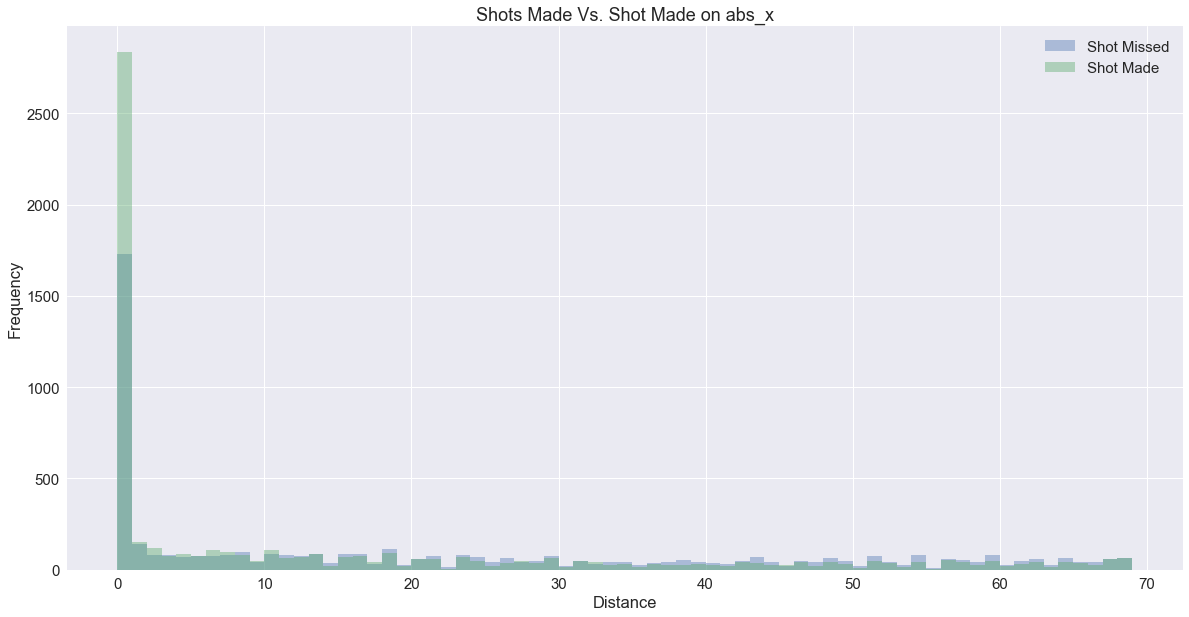

In [11]:
fig, ax = plt.subplots()
Shots_Made = kobe[kobe.shot_made_flag==0].abs_x.hist(bins=np.arange(0,70,1), alpha=.4, label='Shot Missed')
Shots_Missed = kobe[kobe.shot_made_flag==1].abs_x.hist(bins=np.arange(0,70,1), alpha=.4, label='Shot Made')
plt.legend()
plt.title("Shots Made Vs. Shot Made on abs_x")
plt.xlabel("Distance")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

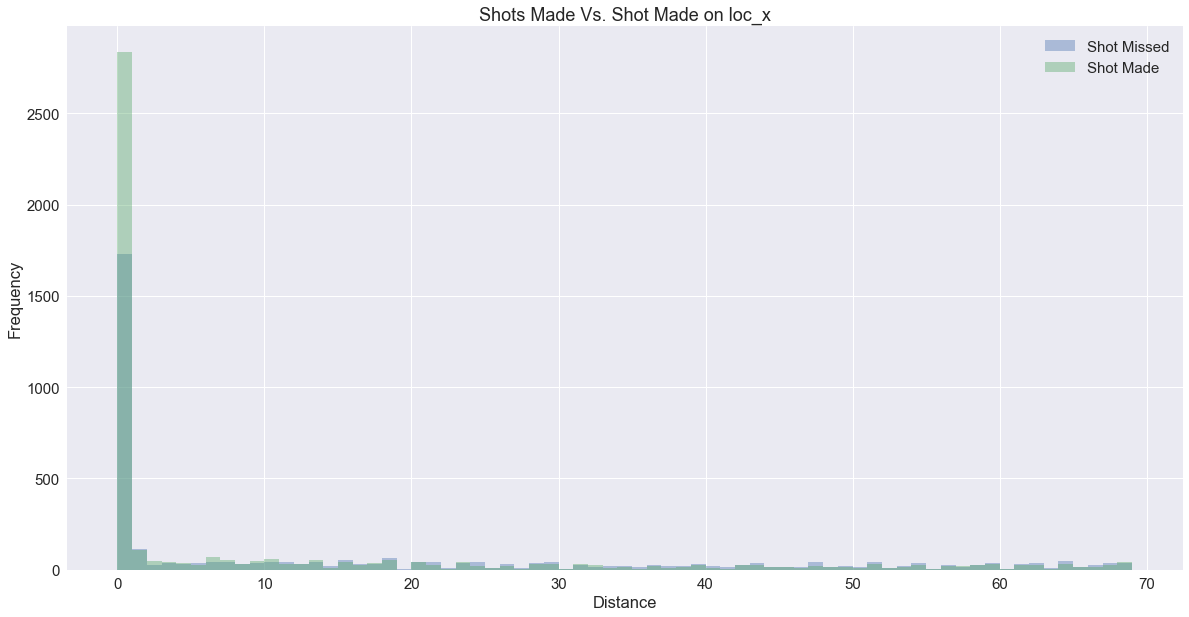

In [12]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].loc_x.hist(bins=np.arange(0,70,1), alpha=.4, label='Shot Missed')
kobe[kobe.shot_made_flag==1].loc_x.hist(bins=np.arange(0,70,1), alpha=.4,  label='Shot Made')
plt.legend()
plt.title("Shots Made Vs. Shot Made on loc_x")
plt.xlabel("Distance")
plt.ylabel("Frequency")

The scatterplot below represents the total shots made/missed and is not representative of the location of where the shot was taken. Since we converted the loc_x to absolute values shots taken from the left side of the court or the negative side of the x-axis are placed on the possitive side of the scatterplot below. 

Text(0,0.5,'Frequency')

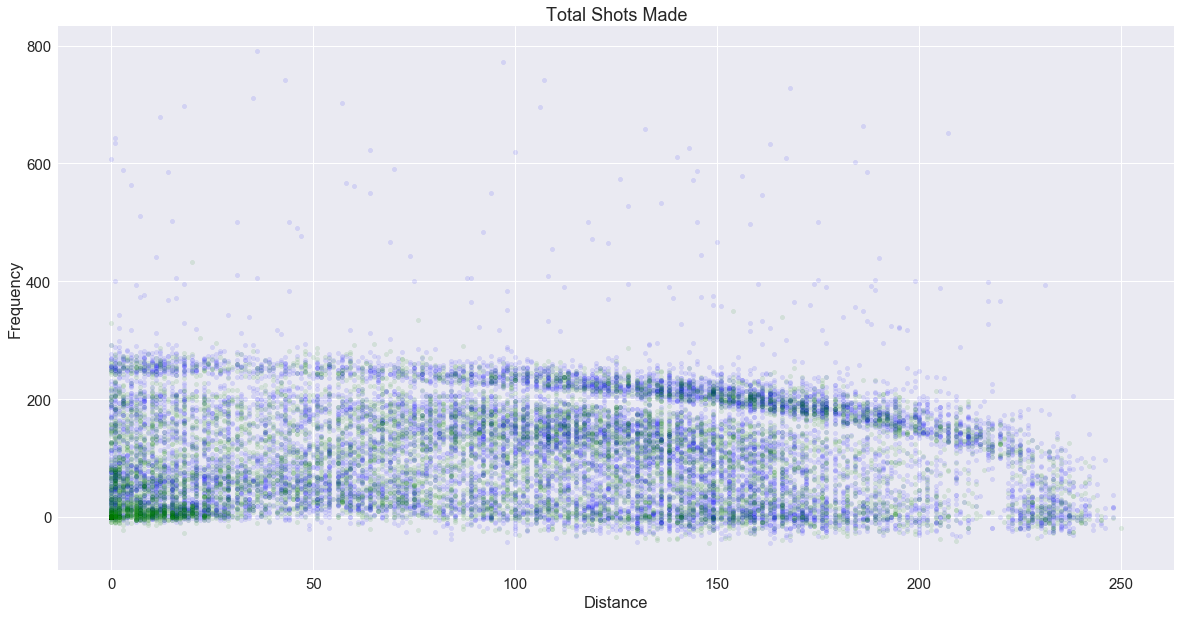

In [13]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='abs_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='abs_x', y='loc_y', color='green', alpha=0.1, ax=ax)

plt.title("Total Shots Made")
plt.xlabel("Distance")
plt.ylabel("Frequency")

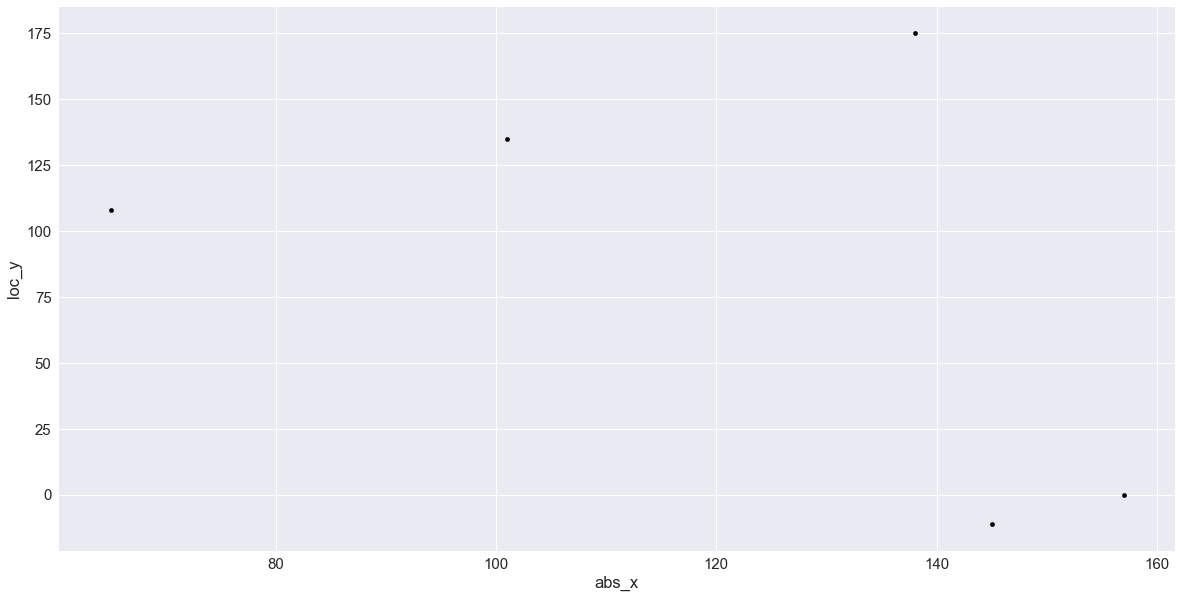

In [14]:
fig, ax = plt.subplots()
kobe[kobe.shot_id==2].plot(kind='scatter', x='abs_x', y='loc_y', color='black', alpha=1, ax=ax)
kobe[kobe.shot_id==3].plot(kind='scatter', x='abs_x', y='loc_y', color='black', alpha=1, ax=ax)
kobe[kobe.shot_id==4].plot(kind='scatter', x='abs_x', y='loc_y', color='black', alpha=1, ax=ax)
kobe[kobe.shot_id==6].plot(kind='scatter', x='abs_x', y='loc_y', color='black', alpha=1, ax=ax)
kobe[kobe.shot_id==9].plot(kind='scatter', x='abs_x', y='loc_y', color='black', alpha=1, ax=ax)

# 2. Convert several (including  ) string columns/features into numerical and attempt to use them in fitting a Logistic Regression model. Show histograms (similar to ones above) of made/missed of these new numerical features. Use these histograms to explain and justify why these features could improve the model

In [15]:
action_type1= kobe.select_dtypes(include=[object])
combined_shot_type1= kobe.select_dtypes(include=[object])
season1= kobe.select_dtypes(include=[object])
shot_type1= kobe.select_dtypes(include=[object])
shot_zone_area1= kobe.select_dtypes(include=[object])
shot_zone_basic1= kobe.select_dtypes(include=[object])
shot_zone_range1= kobe.select_dtypes(include=[object])
team_name1= kobe.select_dtypes(include=[object])
game_date1= kobe.select_dtypes(include=[object])
matchup1= kobe.select_dtypes(include=[object])
opponent1= kobe.select_dtypes(include=[object])

In [149]:
action_type1["action_type"].value_counts().sort_index()

Alley Oop Dunk Shot                   95
Alley Oop Layup shot                  67
Cutting Layup Shot                     6
Driving Bank shot                      3
Driving Dunk Shot                    257
Driving Finger Roll Layup Shot        59
Driving Finger Roll Shot              68
Driving Floating Bank Jump Shot        1
Driving Floating Jump Shot             3
Driving Hook Shot                     13
Driving Jump shot                     23
Driving Layup Shot                  1628
Driving Reverse Layup Shot            83
Driving Slam Dunk Shot                43
Dunk Shot                            217
Fadeaway Bank shot                    27
Fadeaway Jump Shot                   872
Finger Roll Layup Shot                28
Finger Roll Shot                      26
Floating Jump shot                    93
Follow Up Dunk Shot                   10
Hook Bank Shot                         5
Hook Shot                             73
Jump Bank Shot                       289
Jump Hook Shot  

In [20]:
kobe["opponent"] = kobe["opponent"].astype('category')
kobe["matchup"] = kobe["matchup"].astype('category')
kobe["action_type"] = kobe["action_type"].astype('category')
kobe["combined_shot_type"] = kobe["combined_shot_type"].astype('category')
kobe["shot_zone_basic"] = kobe["shot_zone_basic"].astype('category')
kobe["shot_zone_range"] = kobe["shot_zone_range"].astype('category')


In [21]:
kobe["combined_shot_type_cat"] = kobe["combined_shot_type"].cat.codes


In [22]:
kobe["shot_zone_basic_cat"] = kobe["shot_zone_basic"].cat.codes


In [23]:
kobe["shot_zone_range_cat"] = kobe["shot_zone_range"].cat.codes


In [24]:
kobe["action_type_cat"] = kobe["action_type"].cat.codes

In [25]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [26]:
feature_cols = ['action_type_cat','combined_shot_type_cat','shot_zone_basic_cat','shot_zone_range_cat']
X = kobe[feature_cols]
y = kobe.shot_made_flag


In [134]:
X = sklearn.preprocessing.MinMaxScaler().fit_transform(X)

In [147]:
logReg1 = LogisticRegression(C=1.0)
logReg1.fit(X, y)
kobe['pred'] = logReg1.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.60232711989726428

In [148]:
print(classification_report(y, logReg1.predict(X))) #
print(confusion_matrix(y, logReg1.predict(X)))

             precision    recall  f1-score   support

        0.0       0.62      0.74      0.67     14232
        1.0       0.57      0.44      0.50     11465

avg / total       0.60      0.60      0.59     25697

[[10468  3764]
 [ 6455  5010]]


The above logisitic regression model C=1.0 based on action type, combined shot type, shot zone, and shot zone range, had 0.57 precision, 0.44 recall, and 0.50 F1 score for predicting if Kobe would make a shot. 

The histogram below shows the X category action type  "shot type."  The spike around category code "represents" one of Kobe's most popular shot choice, the jump shot. After reviewing the histograms below I believe I could refine the logistic regression model to pine point categories that are relevent in predicting if Kobe will make or miss a shot. 

Text(0,0.5,'Frequency')

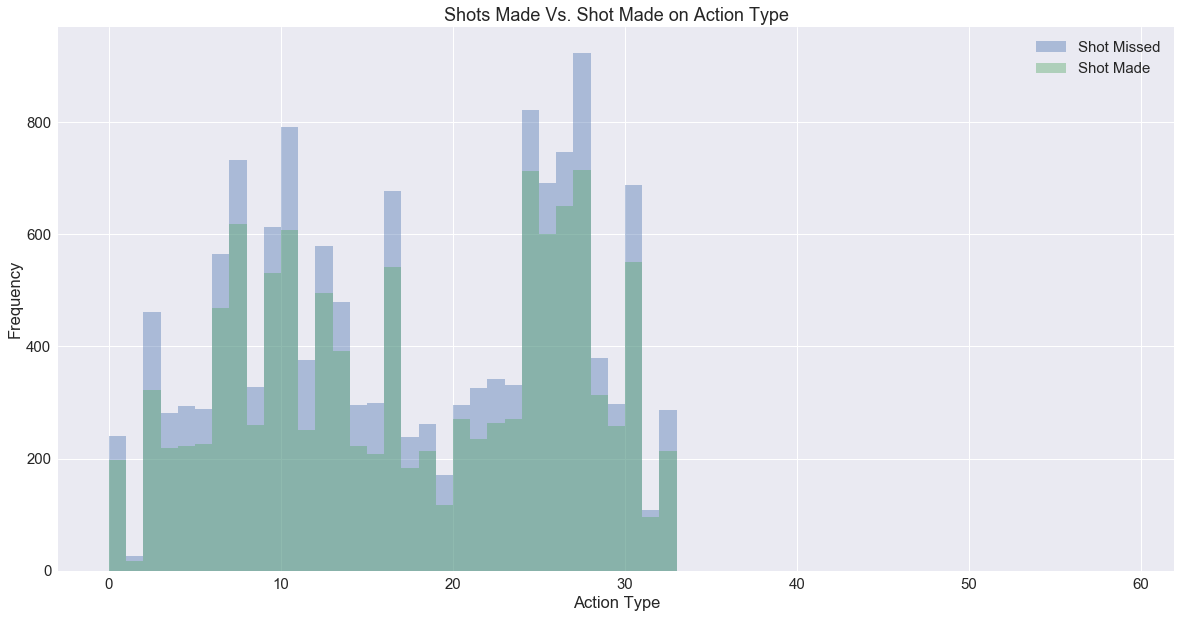

In [91]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].opponent_cat.hist(bins=np.arange(0,60,1), alpha=.4, label='Shot Missed')
kobe[kobe.shot_made_flag==1].opponent_cat.hist(bins=np.arange(0,60,1), alpha=.4,  label='Shot Made')
plt.legend()
plt.title("Shots Made Vs. Shot Made on Action Type")
plt.xlabel("Action Type")
plt.ylabel("Frequency")

For combined action type there were only five categories. Where we see the spike in shots made and missed again represent Kobe's most popular shot choice, the jumpshot.'

Text(0,0.5,'Frequency')

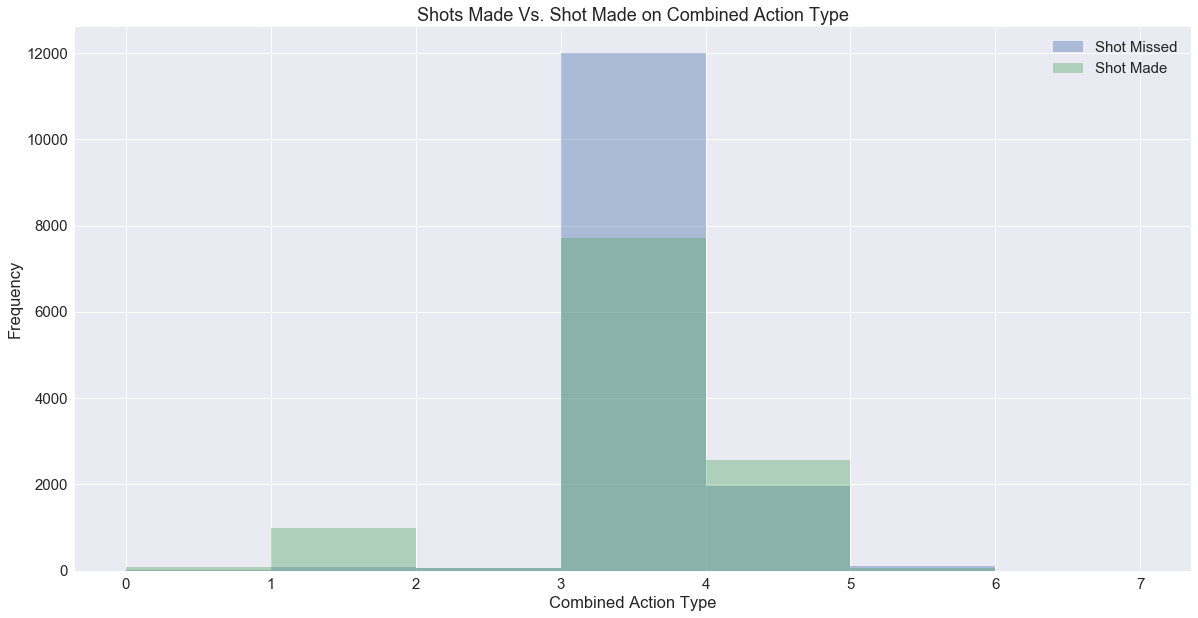

In [93]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].combined_shot_type_cat.hist(bins=np.arange(0,8,1), alpha=.4, label='Shot Missed')
kobe[kobe.shot_made_flag==1].combined_shot_type_cat.hist(bins=np.arange(0,8,1), alpha=.4,  label='Shot Made')
plt.legend()
plt.title("Shots Made Vs. Shot Made on Combined Action Type")
plt.xlabel("Combined Action Type")
plt.ylabel("Frequency")

In this histogram it represents where Kobe frequently shots on the court. The areas where you observe the spikes are mid-range and restricted area. 

Text(0,0.5,'Frequency')

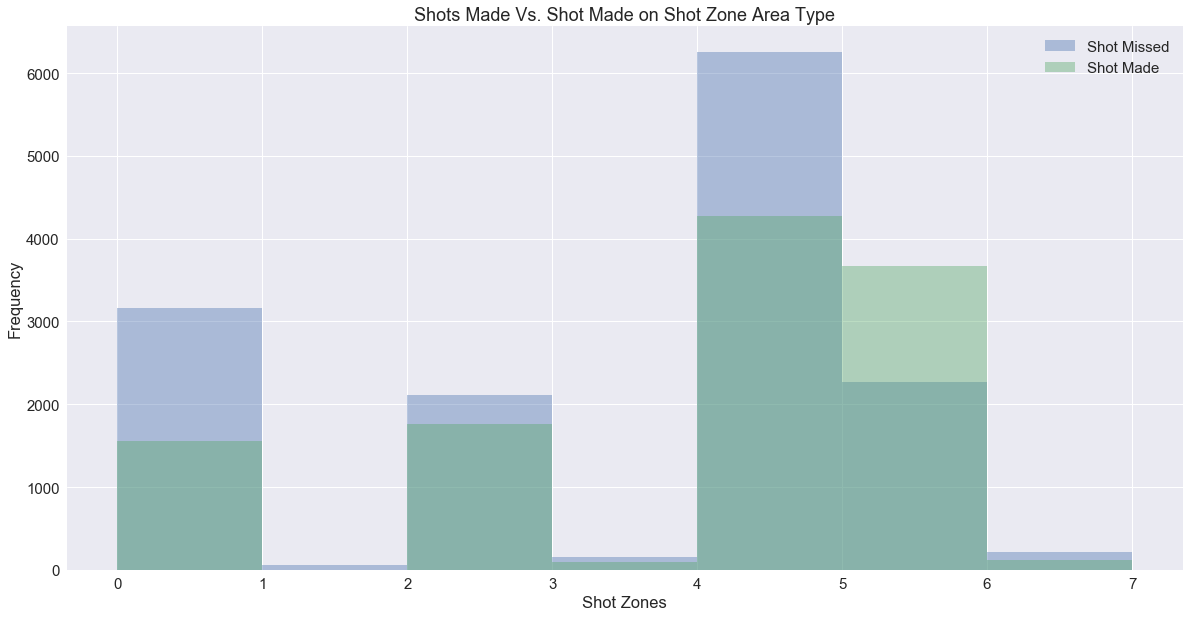

In [99]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].shot_zone_basic_cat.hist(bins=np.arange(0,8,1), alpha=.4, label='Shot Missed')
kobe[kobe.shot_made_flag==1].shot_zone_basic_cat.hist(bins=np.arange(0,8,1), alpha=.4,  label='Shot Made')
plt.legend()
plt.title("Shots Made Vs. Shot Made on Shot Zone Area Type")
plt.xlabel("Shot Zones")
plt.ylabel("Frequency")

The areas to the left represent areas close to the basket and the spike on the right represent longer distance shots. All categories are well distributed except "3" which represents the zone just before the three point line. 

Text(0,0.5,'Frequency')

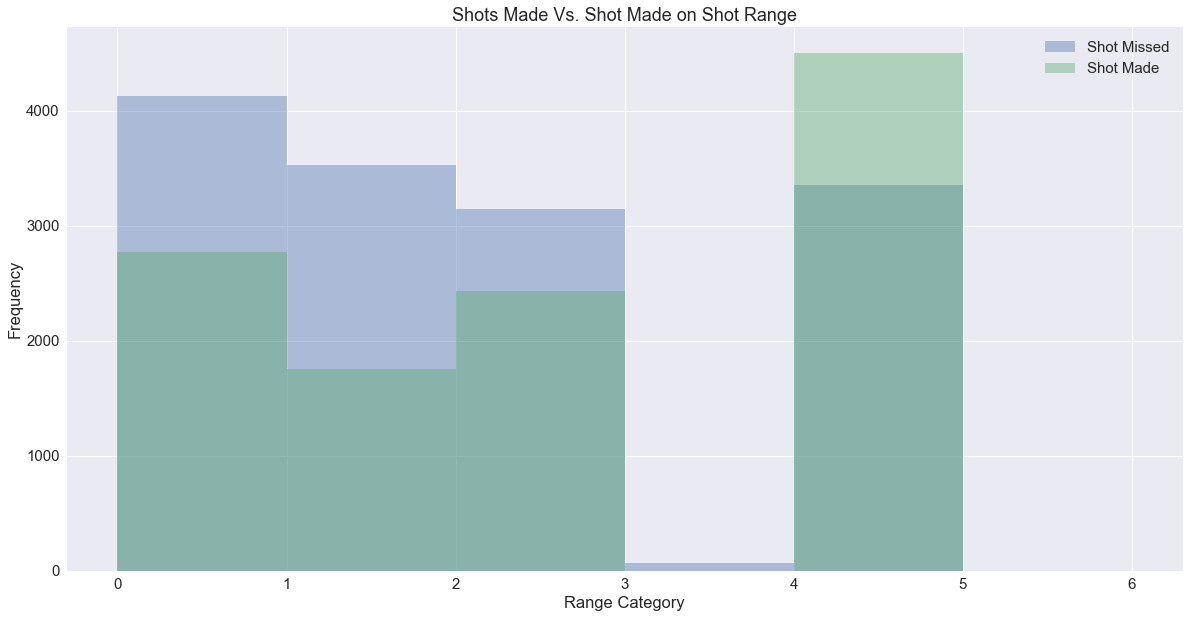

In [102]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].shot_zone_range_cat.hist(bins=np.arange(0,7,1), alpha=.4, label='Shot Missed')
kobe[kobe.shot_made_flag==1].shot_zone_range_cat.hist(bins=np.arange(0,7,1), alpha=.4,  label='Shot Made')
plt.legend()
plt.title("Shots Made Vs. Shot Made on Shot Range")
plt.xlabel("Range Category")
plt.ylabel("Frequency")

2. Convert several (including ) string columns/features into numerical and attempt to use them in fitting a Logistic Regression model. Show histograms (similar to ones above) of made/missed of these new numerical features. Use these histograms to explain and justify why these features could improve the model

# 3. Show a 3 dimensional surface plot [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots] of probabilities from a trained Logistic Regression model using only abs_x and loc_y. The probabilities arise from a distributed grid of x values and y values as input to the predict_proba() function.


Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [14]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

#cross_validation.cross_val_score(model, X, y, cv=10)

In [15]:
feature_cols = ['abs_x', 'loc_y']
X2 = kobe[feature_cols]
y2 = kobe.shot_made_flag

In [16]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X2, y2, test_size=0.4, random_state=0)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#linreg = LinearRegression()
#linreg.fit(X_train, y_train)
#kpred1 = linreg.predict(X_train)

In [19]:
logreg = LogisticRegression(C=5.0)
logreg.fit(X_train, y_train)
kpred2 = logreg.predict(X_train)

In [20]:
logreg1 = LogisticRegression(C=5.0)
logreg1.fit(X_test, y_test)
kpred2 = logreg1.predict(X_test)

In [21]:
X_train = sklearn.preprocessing.MinMaxScaler().fit_transform(X_train)

In [22]:
X_test = sklearn.preprocessing.MinMaxScaler().fit_transform(X_test)

In [23]:
Xtrain_yloc_pred_prob = logreg.predict_proba(X_train)

In [28]:
Xtest_yloc_pred_prob = logreg1.predict_proba(X_test)

In [29]:
Xtrain_yloc_pred_prob #train predictions

array([[ 0.41111183,  0.58888817],
       [ 0.41120999,  0.58879001],
       [ 0.41053612,  0.58946388],
       ..., 
       [ 0.41089982,  0.58910018],
       [ 0.41075175,  0.58924825],
       [ 0.41081649,  0.58918351]])

In [30]:
Xtest_yloc_pred_prob #test predictions

array([[ 0.41996071,  0.58003929],
       [ 0.41993951,  0.58006049],
       [ 0.41942243,  0.58057757],
       ..., 
       [ 0.4198579 ,  0.5801421 ],
       [ 0.41994737,  0.58005263],
       [ 0.41978896,  0.58021104]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = Xtrain_yloc_pred_prob

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)